# Part I - (Prosper Loan Data Exploration)
## by (Ashim Sharma)

 ## Table of Contents
 - Introduction
 - Preliminary Wrangling
 - Univariate Exploration
 - Bivariate Exploration
 - Multivariate Exploration
 - Conclusion


## Introduction
> Loan amount, borrower rate (or rate of interest), current loan status, borrower income, and 81 additional characteristics are among the 113,937 loans in the Prosper loan dataset.

The first peer-to-peer lending platform in the US, Prosper, was established in 2005. Since then, Prosper has helped more than 770,000 borrowers access more than 12 billion USD in loans. People can make profitable and advantageous social investments in one another through Prosper.For a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000, borrowers submit an online application. Investments in loans provide both people and organizations the possibility. Prosper handles all loan servicing on behalf of the matched investors and borrowers.(origin: https://about.prosper.com)  



## Preliminary Wrangling


In [60]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

In [61]:
df_prosper_loan = pd.read_csv('prosperLoanData.csv')
print(df_prosper_loan.shape[0])
df_prosper_loan.head()

113937


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [62]:
df_prosper_loan.tail()

ListingKey  ListingNumber            ListingCreationDate  \
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
113932                0.0                    0.0                  0.0   
113933                0.0                    0.0                  0.0   
113934                0.0                    0.0                  0.0   
113935                0.0                    0.0                  0.0   
113936                0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
113932                             0.0            1.0                0   
113933                             0.0            1.0                0   
113934                             0.0            1.0                0   
113935                             0.0            1.0                0   
113936                             0.0            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
113932                          0                         0.0         1  
113933                          0                         0.0        22  
113934                          0                         0.0       119  
113935                          0                         0.0       274  
113936                          0                         0.0         1  

[5 rows x 81 columns]

In [63]:
df_prosper_loan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [64]:
df_prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [65]:
df_prosper_loan.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [66]:
df_prosper_loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [67]:
for i, v in enumerate(df_prosper_loan.columns):
    print(i, v)

0 ListingKey
1 ListingNumber
2 ListingCreationDate
3 CreditGrade
4 Term
5 LoanStatus
6 ClosedDate
7 BorrowerAPR
8 BorrowerRate
9 LenderYield
10 EstimatedEffectiveYield
11 EstimatedLoss
12 EstimatedReturn
13 ProsperRating (numeric)
14 ProsperRating (Alpha)
15 ProsperScore
16 ListingCategory (numeric)
17 BorrowerState
18 Occupation
19 EmploymentStatus
20 EmploymentStatusDuration
21 IsBorrowerHomeowner
22 CurrentlyInGroup
23 GroupKey
24 DateCreditPulled
25 CreditScoreRangeLower
26 CreditScoreRangeUpper
27 FirstRecordedCreditLine
28 CurrentCreditLines
29 OpenCreditLines
30 TotalCreditLinespast7years
31 OpenRevolvingAccounts
32 OpenRevolvingMonthlyPayment
33 InquiriesLast6Months
34 TotalInquiries
35 CurrentDelinquencies
36 AmountDelinquent
37 DelinquenciesLast7Years
38 PublicRecordsLast10Years
39 PublicRecordsLast12Months
40 RevolvingCreditBalance
41 BankcardUtilization
42 AvailableBankcardCredit
43 TotalTrades
44 TradesNeverDelinquent (percentage)
45 TradesOpenedLast6Months
46 DebtToIncome

In [68]:
df_prosper_loan.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [69]:
sum(df_prosper_loan.duplicated())

0

In [70]:
df_prosper_loan.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### What is the structure of your dataset?

> There are 113,937 loans in this data collection, and there are 81 variables. 113,937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> What characteristics are crucial for forecasting the LoanStatus in the dataset most interests me. What characteristics are particularly significant in determining whether a loan will be finished, charged off, or defaulted.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Borrower Monthly Payment, Borrower Occupation, Borrower State, Borrower Employment Status, Borrower Rate, Borrower APR, Prosper Score, and Loan Amount, in my opinion, are the aspects that will aid me.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [71]:
## df_copy = df_prosper_loan.copy()

In [72]:
primary_colour= sb.color_palette()[2]

# A fantastic suggestion is to visually check for missing values because there are many variables in the data.

In [73]:
missing_values = df_copy.isnull().sum() 
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

BorrowerAPR                                25
CreditScoreRangeUpper                     591
CreditScoreRangeLower                     591
PublicRecordsLast10Years                  697
CurrentDelinquencies                      697
InquiriesLast6Months                      697
TotalCreditLinespast7years                697
FirstRecordedCreditLine                   697
DelinquenciesLast7Years                   990
TotalInquiries                           1159
EmploymentStatus                         2255
Occupation                               3588
BorrowerState                            5515
AvailableBankcardCredit                  7544
TradesOpenedLast6Months                  7544
TradesNeverDelinquent (percentage)       7544
TotalTrades                              7544
CurrentCreditLines                       7604
OpenCreditLines                          7604
PublicRecordsLast12Months                7604
RevolvingCreditBalance                   7604
BankcardUtilization               

In [74]:
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

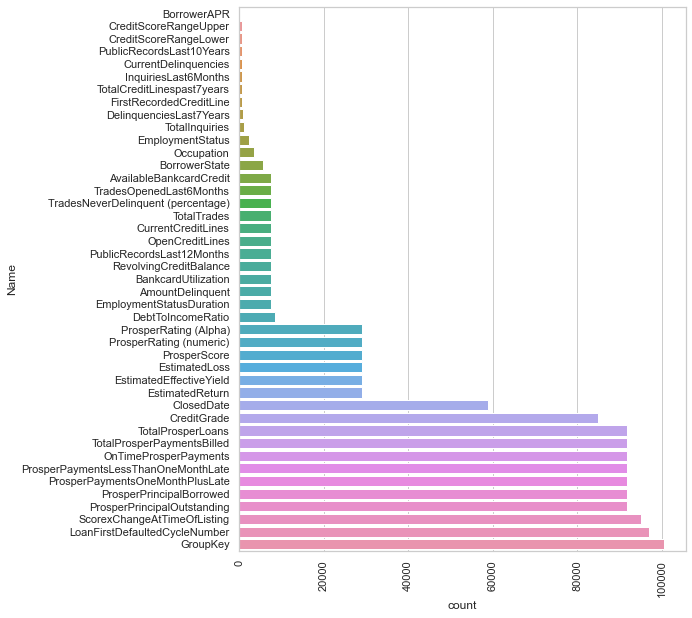

In [75]:
plt.figure(figsize=(8,10))
sb.set(style="whitegrid", color_codes=True)
sb.barplot(x = 'count', y = 'Name', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

# Observation:

 - We have a lot of missing values in some columns, including TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, and LoanFirstDefaultedCyclenumber.

# 1.1 Loan Status

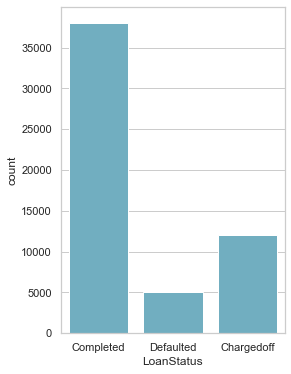

In [76]:
df_prosper_loan_substitute = df_prosper_loan.query('LoanStatus in ["Defaulted", "Completed", "Chargedoff"]')
plt.figure(figsize=(4, 6));
b_color=sb.color_palette()[9]
c_color=sb.color_palette()[2]
sb.countplot(x='LoanStatus', data=df_prosper_loan_substitute, color=b_color);

## 1.2. Listing Category

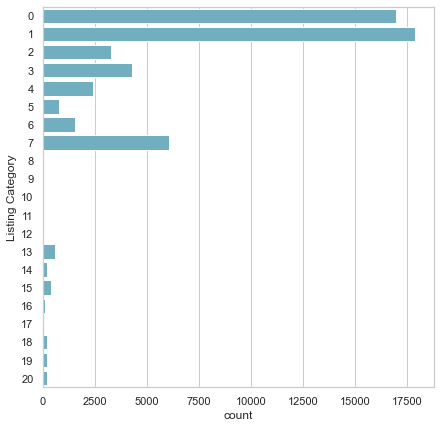

In [77]:
plt.figure(figsize=(7, 7))
sb.countplot(y='ListingCategory (numeric)', data=df_prosper_loan_substitute, color=b_color)
plt.ylabel('Listing Category');

In [78]:
df_prosper_loan_substitute['ListingCategory (numeric)'].dtype

dtype('int64')

In [79]:
# Listing category should be a cagorical variable
# Change it to the appropriate values obtained from the documentation
categories = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
          'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
          'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']
df_prosper_loan_substitute['ListingCategory (numeric)'] = df_prosper_loan_substitute['ListingCategory (numeric)'].apply(lambda i : categories[i])
df_prosper_loan_substitute.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)
df_prosper_loan_substitute['ListingCategory'].dtype

<ipython-input-79-44ea1cdbed31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prosper_loan_substitute['ListingCategory (numeric)'] = df_prosper_loan_substitute['ListingCategory (numeric)'].apply(lambda i : categories[i])
C:\Users\Ashim\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


dtype('O')

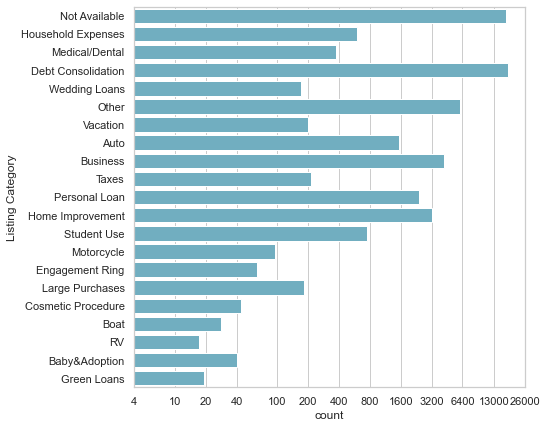

In [80]:
# Plotting with renamed category values and transformed x-values
xticks =[4, 10, 20, 40, 100, 200, 400, 800, 1600, 3200, 6400, 13000, 26000]

plt.figure(figsize=(7, 7))
sb.countplot(y='ListingCategory', data=df_prosper_loan_substitute, color=b_color)
plt.ylabel('Listing Category');
plt.xscale('log')
plt.xticks(xticks, xticks);

> The category with the largest count is "Debt Consolidation," while many people choose "Not available" or "other," and several listing categories have multiple values with low counts that are not visible on the standard scale but are plotted on a logarithmic scale.

## 1.3. Plotting histogram of CreditScoreRangeLower and CreditScoreRangeUpper

# Distribution for the lowest and upper limits of credit scores
fig, ax=plt.subplots(nrows=2, figsize=(7, 10))
color=sb.color_palette()[3]
sb.histplot(x='CreditScoreRangeLower', data=df_prosper_loan_substitute, ax=ax[0], bins=30, kde=True, color=color)

sb.histplot(x='CreditScoreRangeUpper', data=df_prosper_loan_substitute, ax=ax[1], bins=30, kde=True, color=color);

In [81]:
print(df_prosper_loan_substitute.query('CreditScoreRangeLower <= 400').CreditScoreRangeLower.value_counts())
print(df_prosper_loan_substitute.query('CreditScoreRangeUpper <= 400').CreditScoreRangeUpper.value_counts())

0.0      133
360.0      1
Name: CreditScoreRangeLower, dtype: int64
19.0     133
379.0      1
Name: CreditScoreRangeUpper, dtype: int64


## 1.4. Distribution for a credit score with a lower limit and a maximum of 400

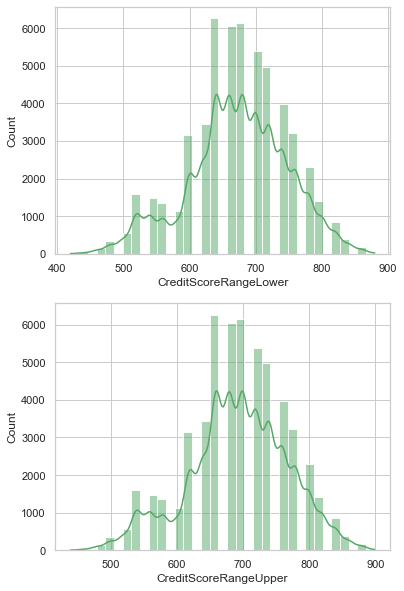

In [82]:
# Distribution for a credit score with a lower limit and a maximum of 400
fig, ax=plt.subplots(nrows=2, figsize=(6, 10))
color=sb.color_palette()[2]
sb.histplot(x='CreditScoreRangeLower', data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreRangeLower>=400], ax=ax[0], bins=35, kde=True,color=color)
sb.histplot(x='CreditScoreRangeUpper', data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreRangeUpper>=400], ax=ax[1], bins=35, kde=True,color=color);

### Finding from above graphs:
> The lowest and upper limits of the credit score range seem to be left skewed, but after more research, it seems that only a small number of values are below 400 and above, where the majority of the data is concentrated. The distribution for both the upper and lower credit limit appears to follow a normal distribution when replotting with those values only greater than 400.
Since the distribution of values in the upper and lower credit score ranges is comparable, using the average of these two columns' values will be simpler.

## 1.5. Plotting Average Credit Score :

<ipython-input-83-088d1ca8eed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prosper_loan_substitute['CreditScoreAverage'] = (df_prosper_loan_substitute.CreditScoreRangeLower + df_prosper_loan_substitute.CreditScoreRangeUpper)/2


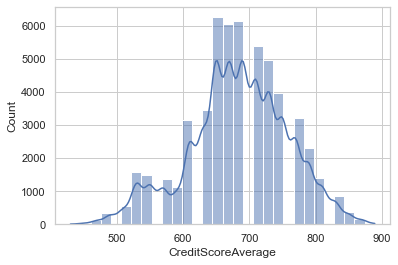

In [83]:
df_prosper_loan_substitute['CreditScoreAverage'] = (df_prosper_loan_substitute.CreditScoreRangeLower + df_prosper_loan_substitute.CreditScoreRangeUpper)/2
sb.histplot(x='CreditScoreAverage', data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreAverage>=400], bins=30, kde=True);

## 1.6. EmploymentStatus:

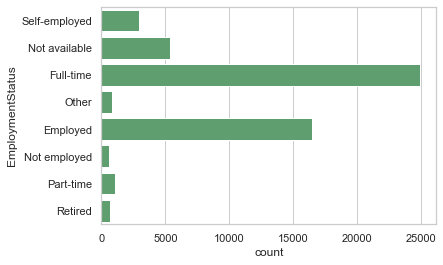

In [84]:
color=sb.color_palette()[2]
sb.countplot(y='EmploymentStatus', data =df_prosper_loan_substitute, color=color);

### The majority of those who received loans, as seen in the above bar graph, are employed.

## 1.7. Plotting the bar graph to check count of person owing the loan is having home or not:

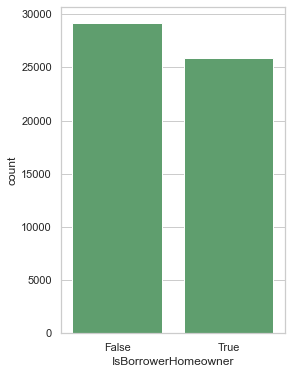

In [85]:
color=sb.color_palette()[2]
plt.figure(figsize=(4, 6))
sb.countplot(x='IsBorrowerHomeowner', data=df_prosper_loan_substitute, color=color);

> We infer from the above bar graph that the majority of those who own loans do not own their homes.

## 1.8. Check for the indicatation whether or not the Borrower was a member of a group when the listing was made.

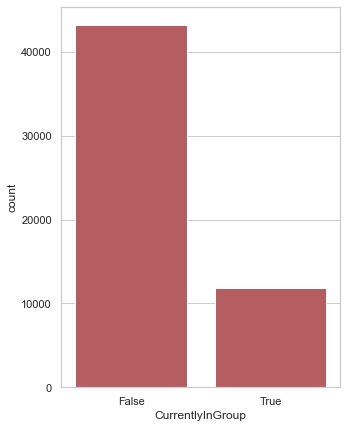

In [86]:
color=sb.color_palette()[3]
plt.figure(figsize=(5, 7))
sb.countplot(x='CurrentlyInGroup', data=df_prosper_loan_substitute, color=color);

> Most borrowers do not fit into any particular group.

## 1.9. Check whether the borrower stated that they had the necessary papers to prove their source of income.

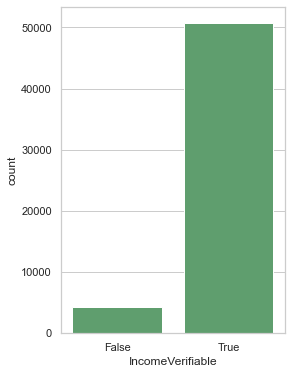

In [87]:
plt.figure(figsize=(4, 6))
sb.countplot(x='IncomeVerifiable', data=df_prosper_loan_substitute, color=c_color);

> Most borrowers with loans have sources of income that can be verified.

## 1.10. Check whether the cumulative principal payments made by the borrower before the loan was charged off. If the debt has already charged off, any recoveries are not included in this figure.

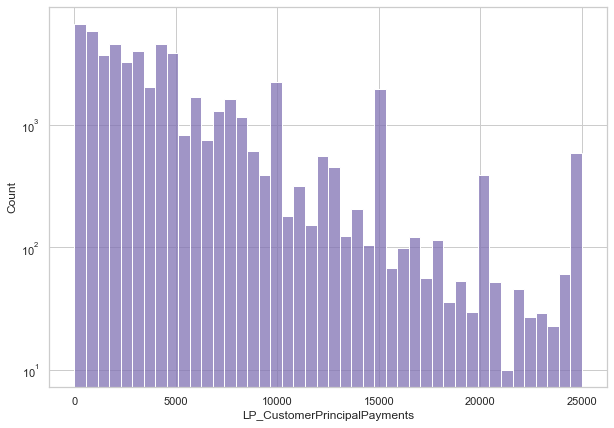

In [88]:
color=sb.color_palette()[4]
plt.figure(figsize=(10, 7))
bins = np.linspace(0, 25000, 45)
sb.histplot(x='LP_CustomerPrincipalPayments', data=df_prosper_loan_substitute, bins=bins,color=color)
plt.yscale('log')

> With spikes at intervals of 5000, the number of payments made prior to being charged off appears to decrease as the sum grows.

## 1.11. Ploting  how many referrals the borrower had at the time the listing was made.

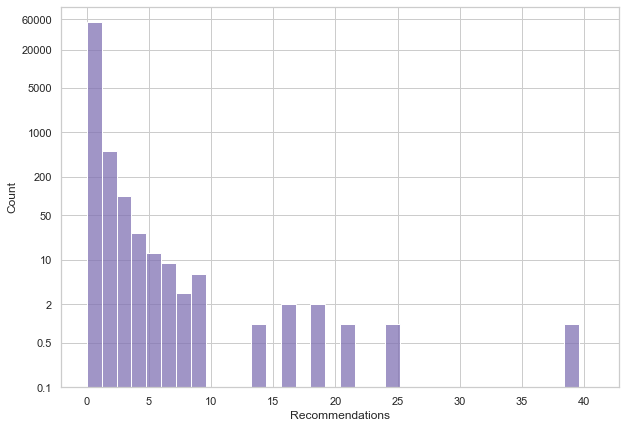

In [89]:
color=sb.color_palette()[4]
plt.figure(figsize=(10, 7))
bins = np.arange(0, 40+1.2, 1.2)
sb.histplot(x='Recommendations', data=df_prosper_loan_substitute, bins=bins,color=color);
plt.yscale('log')
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
plt.yticks(yticks, yticks);

>The distribution of suggestions appears to be right-skewed, with the majority falling below the threshold of 10. This distribution was not apparent from the initial plot, but it is now obvious after choosing a lower bin size and setting the count axis to a log scale.

## 1.12. InvestmentFromFriendsCount

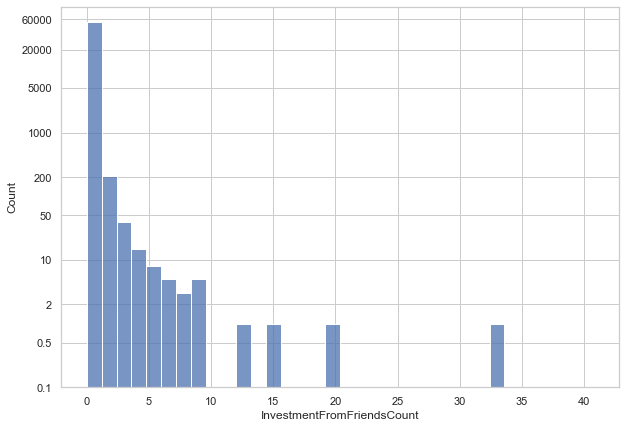

In [90]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, 40+1.2, 1.2)
sb.set(style="whitegrid", color_codes=True)
sb.histplot(x='InvestmentFromFriendsCount', data=df_prosper_loan_substitute, bins=bins);
plt.yscale('log')
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
plt.yticks(yticks, yticks);

> Most InvestmentFromFriendsCount are below 10, giving the InvestmentFromFriendsCount distribution an apparent right skewed distribution. This distribution was not apparent from the initial plot, but it is now obvious after choosing a lower bin size and setting the count axis to a log scale.
Additionally, given that they appear to be equally distributed, InvestmentFromFriendsCount and Recommendations 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no out of the ordinary occurrences noted, and the variable of interest is a categorical variable. Only the values of the interest variable that are pertinent to the goals of this investigation were chosen as the only transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The lower and upper limits of the credit score range, recommendations, and investment from friends count all had a few outlier points that were noticed, but these values were left in the dataset because they don't have any negative effects on the quality of the data and are simply a few exceptions to the rule.

>Additionally, the values for the listing category were transformed into strings based on information taken from the dataset description.

>Finally, because the distribution of the credit score ranges upper and lower is comparable, they were combined into a single column called CreditScoreAverage by averaging the values from the two columns.

## 2.Bivariate Exploration

> I'll start by looking into the connections between the relevant numerical variables.

## 2.1 Relationship between numerical variables:

In [91]:
rel_numeric_var= ['InvestmentFromFriendsCount', 'Recommendations', 'CreditScoreAverage', 'LP_CustomerPrincipalPayments']
catagory_var = ['ListingCategory', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup','IncomeVerifiable', 'LoanStatus']

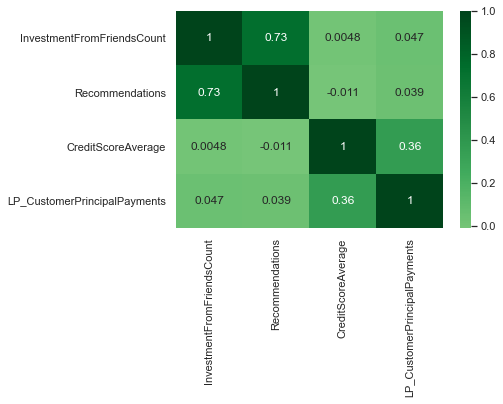

In [92]:
sb.heatmap(data= df_prosper_loan_substitute[rel_numeric_var].corr(), annot=True, cmap='Greens', center=0);

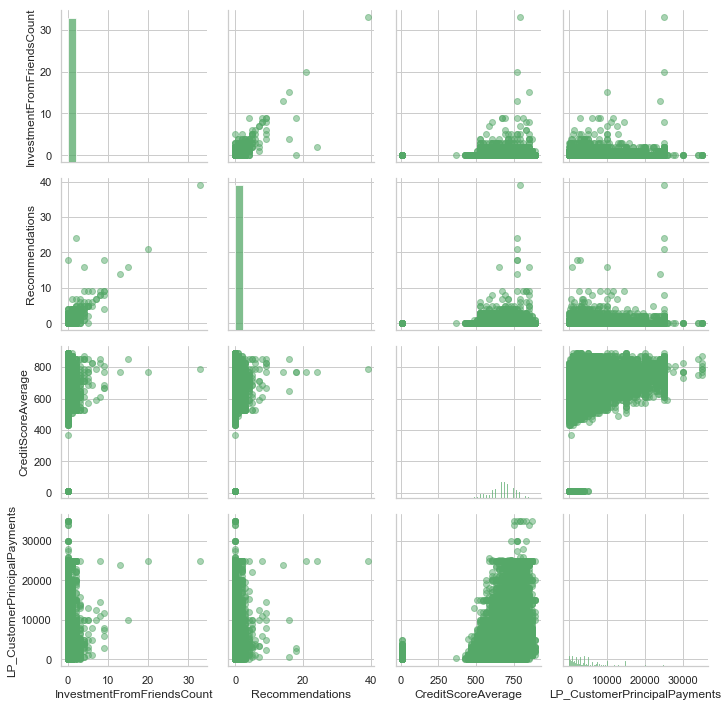

In [152]:
color=sb.color_palette()[2]
g=sb.PairGrid(data=df_prosper_loan_substitute,vars=rel_numeric_var)
g.map_diag(sb.histplot,color=color)
g.map_offdiag(plt.scatter,color=color,alpha=0.5);

><b>As anticipated, there is a strong correlation between the Recommendations count and InvestmentFromFriendsCount, and there is a weaker correlation between the average credit score and the Principal payments made prior to being charged off. Additionally, only a small percentage of the recommendations and investments from friends have a count value higher than 10, with the majority falling below 10.
Next, I'll look into how the variable of interest behaves and how the distribution of the other variables changes as a result.

## 2.2 Distribution of recommendations based on loan 

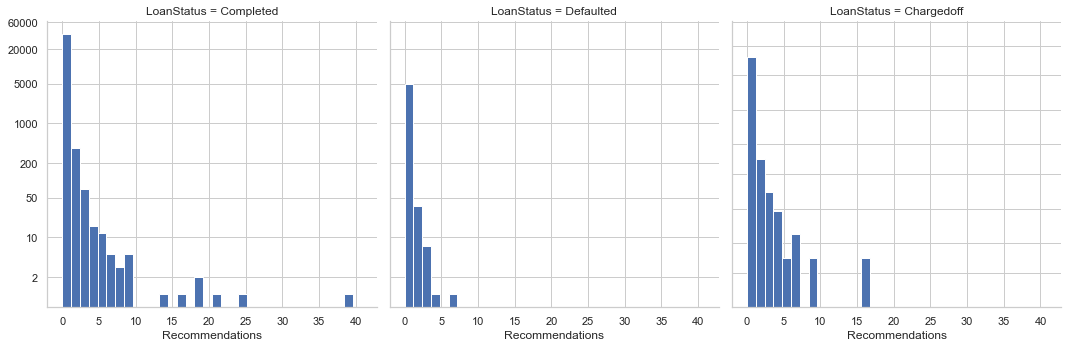

In [94]:
every_var = ['InvestmentFromFriendsCount', 'Recommendations', 'CreditScoreRangeLower', 'CreditScoreRangeUpper','ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup','IncomeVerifiable', 'LoanStatus']
request=df_prosper_loan_substitute.LoanStatus.unique()
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=5)
g.map(plt.hist, 'Recommendations', bins=bins)
g.set(yscale='log', yticks=yticks, yticklabels=yticks);

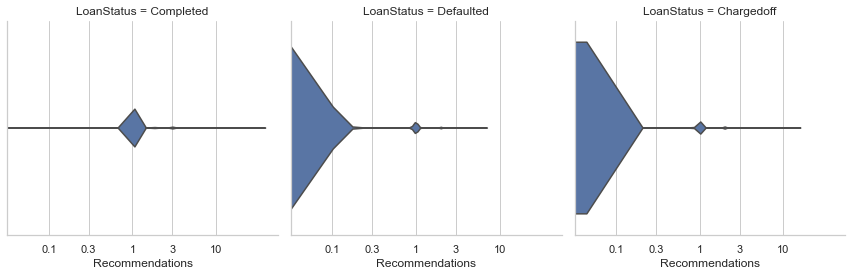

In [95]:
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
g.map(sb.violinplot, 'Recommendations', order=request)
xticks = [0.1, 0.3, 1, 3, 10]
g.set(xscale='log', xticks=xticks, xticklabels=xticks);

## 2.3 Friends' contributions are distributed according to loan 

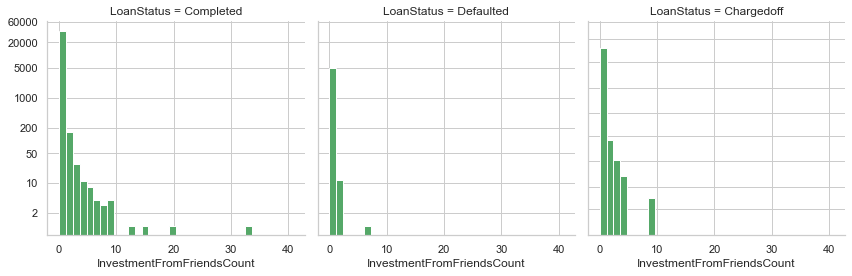

In [96]:
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
g.map(plt.hist, 'InvestmentFromFriendsCount', bins=bins,color=c_color)
g.set(yscale='log', yticks=yticks, yticklabels=yticks);

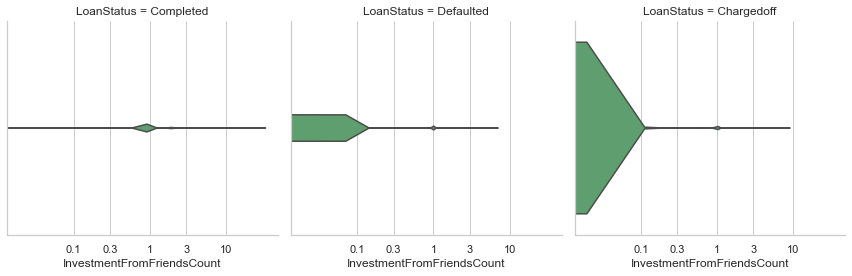

In [97]:
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
g.map(sb.violinplot, 'InvestmentFromFriendsCount', order=request,color=c_color)
xticks = [0.1, 0.3, 1, 3, 10]
g.set(xscale='log', xticks=xticks, xticklabels=xticks);

In [98]:
10**0.1

1.2589254117941673

> <b>According to the histogram plot, the majority of borrowers have fewer than 10 recommendations, and investments from friends are taken into account when determining whether a loan is finished, defaulted on, or charged off. This supports the earlier finding while also demonstrating that completed loans with investments from friends and recommendations of fewer than ten are more common than defaulted and charged-off loans.A deeper understanding of the distribution is provided by the violin plot, which demonstrates that while the majority of completed loans have at least 10 recommendations and investments from friends, the majority of defaulted or charged-off loans have recommendations and investments from friends that total less than 2.

## 2.4 Distribution of average credit scores by loan status:

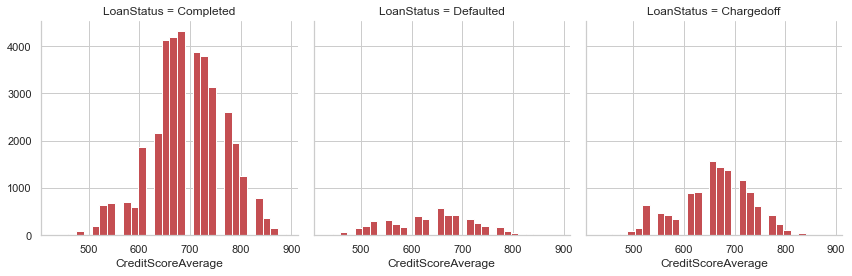

In [99]:
color=sb.color_palette()[3]
g=sb.FacetGrid(data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreAverage>=400], col='LoanStatus', height=4)
g.map(plt.hist, 'CreditScoreAverage', bins=30,color=color);

><b>This graph demonstrates that borrowers with average credit scores between 600 and 800 were more likely to repay their loans in full than they were to default.
The graphic below enlarges this observation and demonstrates that while the mean creditscoreaverage for completed loans is roughly 700, that for defaulted and charged-off loans is roughly 650 and 680, respectively.
The plot also reveals that most borrowers who paid off their debts had credit scores averaging between 650 and 750, whereas most borrowers who defaulted or were charged off had scores averaging below 700.

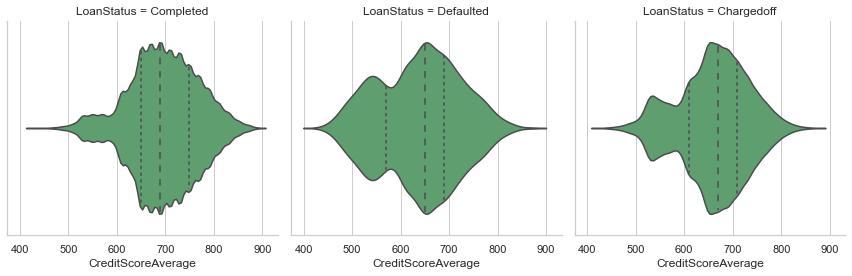

In [100]:
g=sb.FacetGrid(data=df_prosper_loan_substitute[df_prosper_loan_substitute.CreditScoreAverage>=400], col='LoanStatus', height=4)
g.map(sb.violinplot, 'CreditScoreAverage', inner='quartile', bins=30, order=request,color=c_color);

## 2.5 Distribution of employment status by loan status

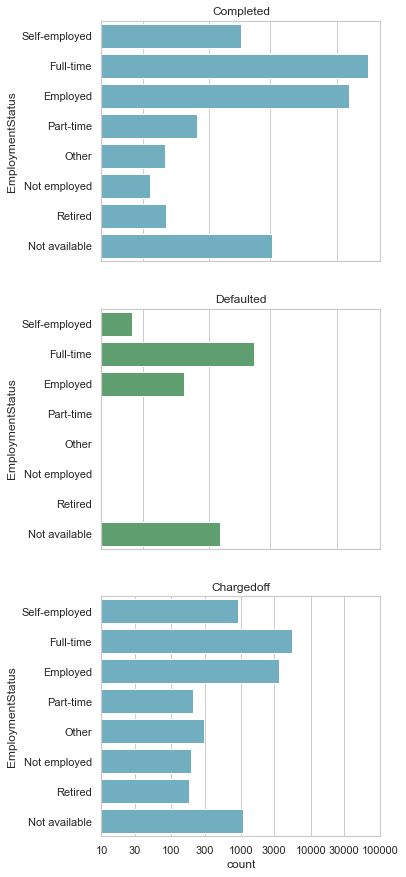

In [101]:
fig, ax=plt.subplots(nrows=3, figsize=(5,15), sharex = True)
xticks=[10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
request = ['Self-employed', 'Full-time', 'Employed', 'Part-time', 'Other', 'Not employed', 'Retired', 'Not available']

sb.countplot(data=df_prosper_loan_substitute.query('LoanStatus=="Completed"'), y='EmploymentStatus', ax=ax[0], color=b_color, order=request)
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.countplot(data=df_prosper_loan_substitute.query('LoanStatus=="Defaulted"'), y='EmploymentStatus', ax=ax[1], color=c_color, order=request)
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')

sb.countplot(data=df_prosper_loan_substitute.query('LoanStatus=="Chargedoff"'), y='EmploymentStatus', ax=ax[2], color=b_color, order=request)
ax[2].set_title('Chargedoff')

plt.xscale('log')
plt.xticks(xticks,xticks);

## 2.6 Verifiable employment status and income:

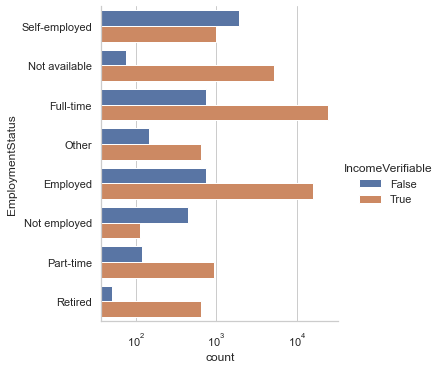

In [102]:
g=sb.catplot(data=df_prosper_loan_substitute, hue='IncomeVerifiable', y='EmploymentStatus', kind='count', orient='v')
g.set(xscale='log');

In [103]:
df_prosper_loan_substitute.groupby('EmploymentStatus')['LoanStatus'].value_counts()

EmploymentStatus  LoanStatus
Employed          Completed     12332
                  Chargedoff     3529
                  Defaulted       630
Full-time         Completed     17397
                  Chargedoff     5343
                  Defaulted      2217
Not available     Completed      3077
                  Defaulted      1204
                  Chargedoff     1065
Not employed      Completed       344
                  Chargedoff      190
                  Defaulted        27
Other             Completed       449
                  Chargedoff      295
                  Defaulted        54
Part-time         Completed       794
                  Chargedoff      202
                  Defaulted        60
Retired           Completed       459
                  Chargedoff      180
                  Defaulted        58
Self-employed     Completed      1783
                  Chargedoff      897
                  Defaulted       246
Name: LoanStatus, dtype: int64

><b>The majority of those who receive loans often hold steady jobs and can prove their income. The plot and value counts discussed above allow for the following conclusion to be drawn as well.Fully employed borrowers (Employed, Full-time, Part-Time) receive loans with a greater completion rate than defaulters.Other than the categories listed above, loans given out have default rates of greater than or equal to 50%.According to this, people who are fully employed will be less prone to default than those who are not.

## 2.7 Verifiable revenue distribution according to loan 

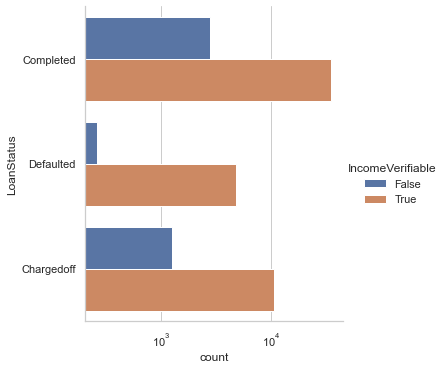

In [111]:
g=sb.catplot(data=df_prosper_loan_substitute, hue='IncomeVerifiable', y='LoanStatus', kind='count', orient='v')
g.set(xscale='log');

><b>The majority of borrowers who receive loans and who can provide proof of their income repay them in full, but this is also true 

## 2.8 Listing the proportion of categories for each loan status

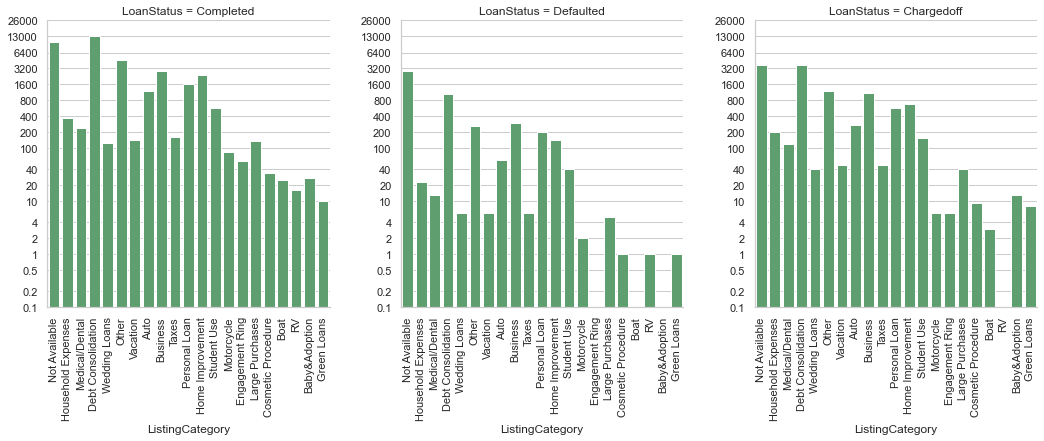

In [113]:
request = df_prosper_loan_substitute.ListingCategory.unique()
yticks =[0.1, 0.2, 0.5, 1, 2, 4, 10, 20, 40, 100, 200, 400, 800, 1600, 3200, 6400, 13000, 26000]
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=5, sharey=False)
g.map(sb.countplot, 'ListingCategory', order=request,color=c_color)
g.set(yscale='log', yticks=yticks, yticklabels=yticks)
g.set_xticklabels(rotation=90);

In [114]:
df_prosper_loan_substitute.groupby('ListingCategory')['LoanStatus'].value_counts()

ListingCategory     LoanStatus
Auto                Completed      1210
                    Chargedoff      270
                    Defaulted        59
Baby&Adoption       Completed        27
                    Chargedoff       13
Boat                Completed        25
                    Chargedoff        3
Business            Completed      2848
                    Chargedoff     1108
                    Defaulted       301
Cosmetic Procedure  Completed        34
                    Chargedoff        9
                    Defaulted         1
Debt Consolidation  Completed     13167
                    Chargedoff     3655
                    Defaulted      1045
Engagement Ring     Completed        57
                    Chargedoff        6
Green Loans         Completed        10
                    Chargedoff        8
                    Defaulted         1
Home Improvement    Completed      2434
                    Chargedoff      669
                    Defaulted       141
Household

## Findings:
 - The number of debt consolidation loans that have been completed is largest (13167), followed by the number of defaulted loans (1045), and the number of loans that have been charged off (3655). The above value counts analysis and plot also demonstrate the correlations between the variables.

 - There is a considerable likelihood that business loans will be charged off.
 - Most personal loans, including those for "vacation," "taxes," "personal loans," "home improvement," "student use," "engagement ring," "large purchases," "cosmetic procedures," "boat," "RV," "baby and adoption," "green loans," and "wedding loans," have a high completion rate compared to their defaulted and charged-of rates.

## 2.9. In Group vs Loan Status at the moment

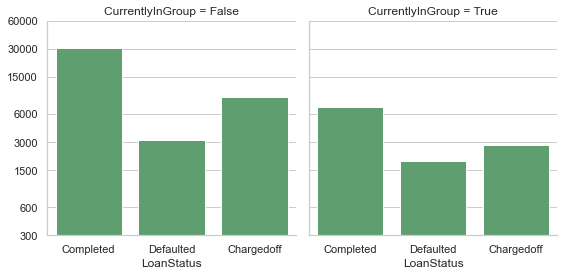

In [115]:
request = df_prosper_loan_substitute.LoanStatus.unique()
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='CurrentlyInGroup', height=4)
g.map(sb.countplot, 'LoanStatus', order=request,color=c_color)
g.set(yscale='log')
yticks=[300, 600, 1500, 3000, 6000, 15000, 30000, 60000]
g.set(yticks=yticks, yticklabels=yticks);

><b>In contrast to the (6000) finished loans for individuals who are members of a group, the majority of those who do not belong to any group successfully completed their loans (30 000).

## 2.10. Isborrowerhomeowner VS Loan Status

<Figure size 576x720 with 0 Axes>

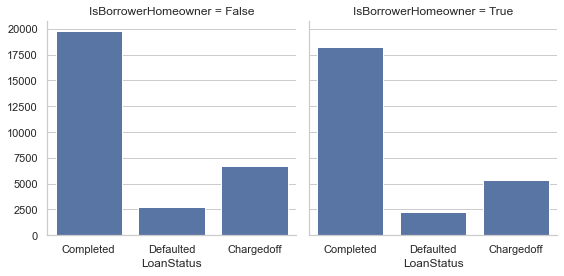

In [120]:
plt.figure(figsize=(8,10));
sb.set(style="whitegrid", color_codes=True);
g = sb.FacetGrid(data=df_prosper_loan_substitute, col='IsBorrowerHomeowner', height=4);
g.map(sb.countplot, 'LoanStatus', order=request);

><b>The graph above demonstrates that a borrower's ownership status does not appear to affect whether a loan will be repaid in whole, charged off, or defaulted.

## 2.11. LP_CustomerPrincipalPayments vs LoanStatus

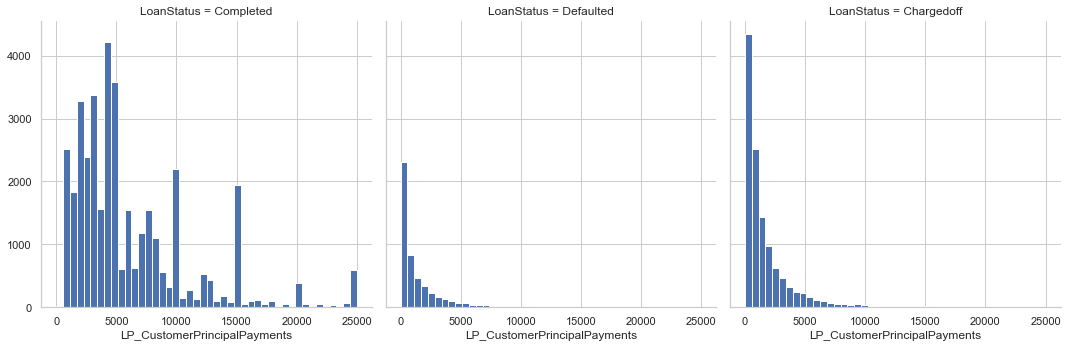

In [122]:
bins = np.linspace(0, 25000, 45)
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=5)
g.map(plt.hist, 'LP_CustomerPrincipalPayments', bins=bins);

><b> Most completed loans include principle payments of at least $5,000, according to the plot above.

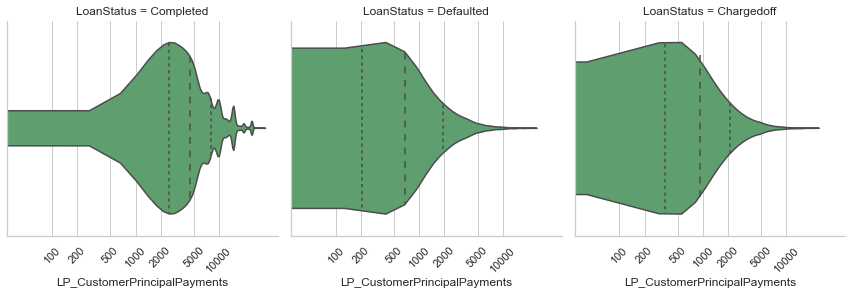

In [123]:
xticks = [100, 200, 500, 1000, 2000, 5000, 10000]
g=sb.FacetGrid(data=df_prosper_loan_substitute, col='LoanStatus', height=4)
g.map(sb.violinplot, 'LP_CustomerPrincipalPayments', bins=bins, inner='quartile', order=request,color=c_color)
g.set(xscale='log', xticks=xticks, xticklabels=xticks)
g.set_xticklabels(rotation=45);

><b>When we enlarge the violin plot below, the following is what we can see:<br>
Principal payments on completed loans that were initially written off range between 2000 and 5000.
The majority of charged off and defaulted loans with unpaid principle balances had principal payments ranging from 0 to 1000.

## 2.12. Comparison of friend investments against recommendations

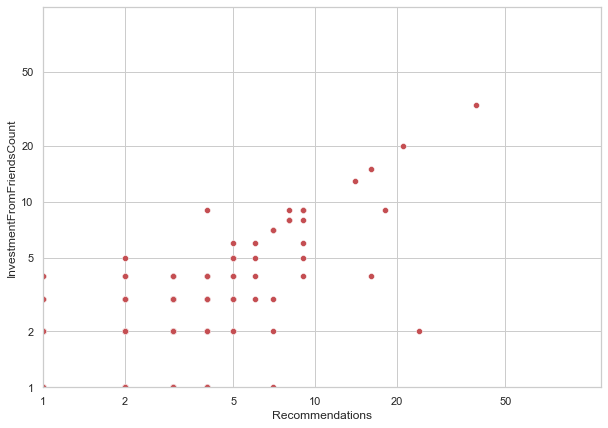

In [124]:
color=sb.color_palette()[3]
plt.figure(figsize=(10, 7))
sb.scatterplot(x='Recommendations', y='InvestmentFromFriendsCount', data=df_prosper_loan_substitute,color=color)
ticks=[1, 2, 5, 10, 20, 50]
plt.xscale('log') 
plt.yscale('log')
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks);

><b>With a few exceptions, investment from friends rises as recommendations rise for the majority of loans in our sample. This supports the previously noted correlation of 0.73.

## 2.13. Average credit score in comparison to principal paid before being charged off

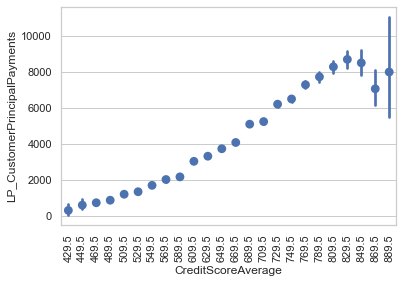

In [125]:
sb.pointplot(y='LP_CustomerPrincipalPayments', x='CreditScoreAverage',
               data=df_prosper_loan_substitute[df_prosper_loan_substitute['CreditScoreAverage']>=400],
              join=False)
plt.xticks(rotation=90);

><b>With an average credit score increase, the average payment amount made prior to a charge-off appears to rise.

## 2.14 Prosper Score VS Employement Status:

In [126]:
mt_counts=df_prosper_loan_substitute.groupby(['EmploymentStatus','ProsperScore']).size()
mt_counts

EmploymentStatus  ProsperScore
Employed          1.0              300
                  2.0              897
                  3.0             1055
                  4.0             1937
                  5.0             2263
                                  ... 
Self-employed     7.0               79
                  8.0               94
                  9.0               68
                  10.0              22
                  11.0               2
Length: 72, dtype: int64

In [127]:
mt_counts=mt_counts.reset_index(name='count')
mt_counts

EmploymentStatus  ProsperScore  count
0          Employed           1.0    300
1          Employed           2.0    897
2          Employed           3.0   1055
3          Employed           4.0   1937
4          Employed           5.0   2263
..              ...           ...    ...
67    Self-employed           7.0     79
68    Self-employed           8.0     94
69    Self-employed           9.0     68
70    Self-employed          10.0     22
71    Self-employed          11.0      2

[72 rows x 3 columns]

In [128]:
mt_counts = mt_counts.pivot(index = 'EmploymentStatus' , columns = 'ProsperScore' , values = 'count')
mt_counts

ProsperScore       1.0    2.0     3.0     4.0     5.0     6.0     7.0   \
EmploymentStatus                                                         
Employed          300.0  897.0  1055.0  1937.0  2263.0  2800.0  2105.0   
Full-time         144.0  128.0   213.0   344.0   553.0   690.0   759.0   
Not employed        2.0   20.0    39.0    60.0    72.0    72.0    51.0   
Other              20.0   62.0    90.0   135.0   138.0   148.0    86.0   
Part-time           3.0    6.0     5.0    13.0    26.0    20.0    31.0   
Retired            11.0   14.0     9.0    17.0    25.0    38.0    43.0   
Self-employed     133.0  168.0   155.0   225.0   207.0   177.0    79.0   

ProsperScore        8.0     9.0    10.0  11.0  
EmploymentStatus                               
Employed          2880.0  1277.0  935.0  30.0  
Full-time         1332.0  1714.0  653.0   NaN  
Not employed        36.0    20.0    3.0   NaN  
Other               81.0    30.0    8.0   NaN  
Part-time           49.0    59.0   12.0   NaN  
Retired             44.0    48.0   20.0   NaN  
Self-employed       94.0    68.0   22.0   2.0

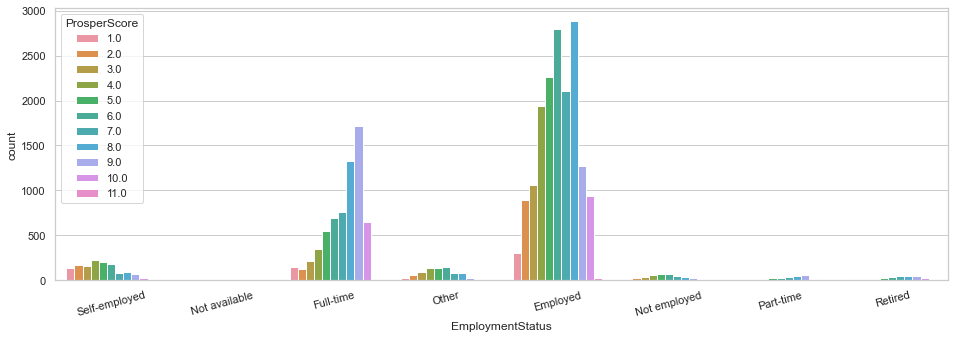

In [129]:
plt.figure(figsize = [16,5])
axis = sb.countplot(data = df_prosper_loan_substitute, x = 'EmploymentStatus' , hue = 'ProsperScore');
plt.xticks(rotation = 15);

## Findings:

><b>Employed Borrowers receive the highest Prosper rating.<br>
><b>The number of Prosper Rated Borrowers in various Employment Statuses differs greatly.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 - The loan status has the strongest correlation with the following attributes of all those under investigation:
   Recommendations and investments from friends count: Most loans below this count defaulted, but at least ten recommendations      and investments from friends led to a completed loan status.
 - Average credit score: Those who successfully repaid their loans often have scores between 650 and 750, while those who defaulted or were charged off typically have scores below 700.
 - Employment Status: Individuals with full-time jobs typically have greater loan completion rates than unemployed individuals.
 - Personal loans perform better than corporate loans, according to the listing category.
 - Loans with principal payments made before charged off amounts less than 1000 are not likely to be repaid in whole. While the likelihood of completion is higher for those between 2000 and 5000.
 
>And the least discernible connection to the ensuing characteristics:

 - Verifiable income source: Given that both groups are more likely to default than neither group, there doesn't seem to be much of a difference in the completion rates between the two groups.

 - Current Group Membership: There isn't much of a difference between those in groups and those who aren't. Because of how the story is written, people who are a part of a group default equally as frequently as people who are not.

 - Is Borrower a Homeowner? Both homeowners and renters are more likely to default than other borrowers.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 
 - The likelihood of a friend's investment increases with the number of recommendations. This makes sense because friends are more likely to receive recommendations and loans than strangers.

 - Prior principal payments have some relationship with the typical credit score as well.

 - Most people who have jobs also have dependable sources of income.

## Multivariate Exploration

> Inside this part, I will look at the dispersion of the job status for each loan status while accounting for other interesting predictive variables to further explore the connection between loan status and employment.

## 3.1 Employment situation, Credit score on average, and Loan status

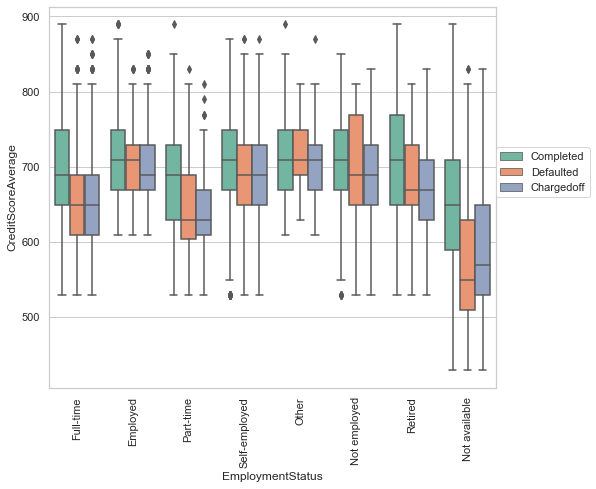

In [130]:
request = ['Full-time', 'Employed', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired', 'Not available']
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=df_prosper_loan_substitute.query('CreditScoreAverage>=400'), y='CreditScoreAverage', 
           color=c_color, order=request, x='EmploymentStatus', ax=ax, hue='LoanStatus', palette='Set2')
plt.legend(loc=(1, 0.5))
plt.xticks(rotation=90);

> <b> The graph above supports earlier findings that people who are completely employed prefer to repay their debts, and it also demonstrates that people who are fully employed but default on their loans have lower average credit scores than people who successfully repay their loans. We can also see that those who select "Not available" for their work status are most likely to default, and the majority of them also have average credit scores below 650.

## 3.2. Employment state, The number of investments made by friends and Loan status

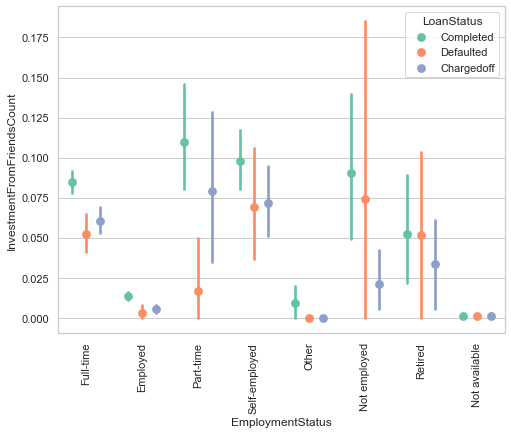

In [131]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='InvestmentFromFriendsCount', data=df_prosper_loan_substitute, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=request, palette='Set2')
plt.xticks(rotation=90);

> <b> Compared to the other categories in our dataset, those who are employed full-time had a higher average investment from friends count.


## 3.3. Loan Status versus. Loan Origination Year and ListingCategory (numeric)

In [135]:
np.random.seed(2018)
sample=np.random.choice(df_copy.shape[0] , 50000 , replace=False)
df_subset = df_copy.loc[sample]
df_copy['LoanOriginationDate']= pd.to_datetime(df_copy['LoanOriginationDate'])

df_copy['Originationyear'] = df_copy['LoanOriginationDate'].dt.year
df_copy['Originationmonth'] = df_copy['LoanOriginationDate'].dt.month
df_copy['Originationday'] = df_copy['LoanOriginationDate'].dt.day

df_copy.head(2)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   

   BorrowerRate  LenderYield  ...  LP_NetPrincipalLoss  \
0         0.158        0.138  ...                  0.0   
1         0.092        0.082  ...                  0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                              0.0            1.0                0   
1                              0.0            1.0                0   

  InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  \
0                          0                          0.0        258   
1                          0                          0.0          1   

  Originationyear Originationmonth Originationday  
0            2007                9             12  
1            2014                3              3  

[2 rows x 84 columns]

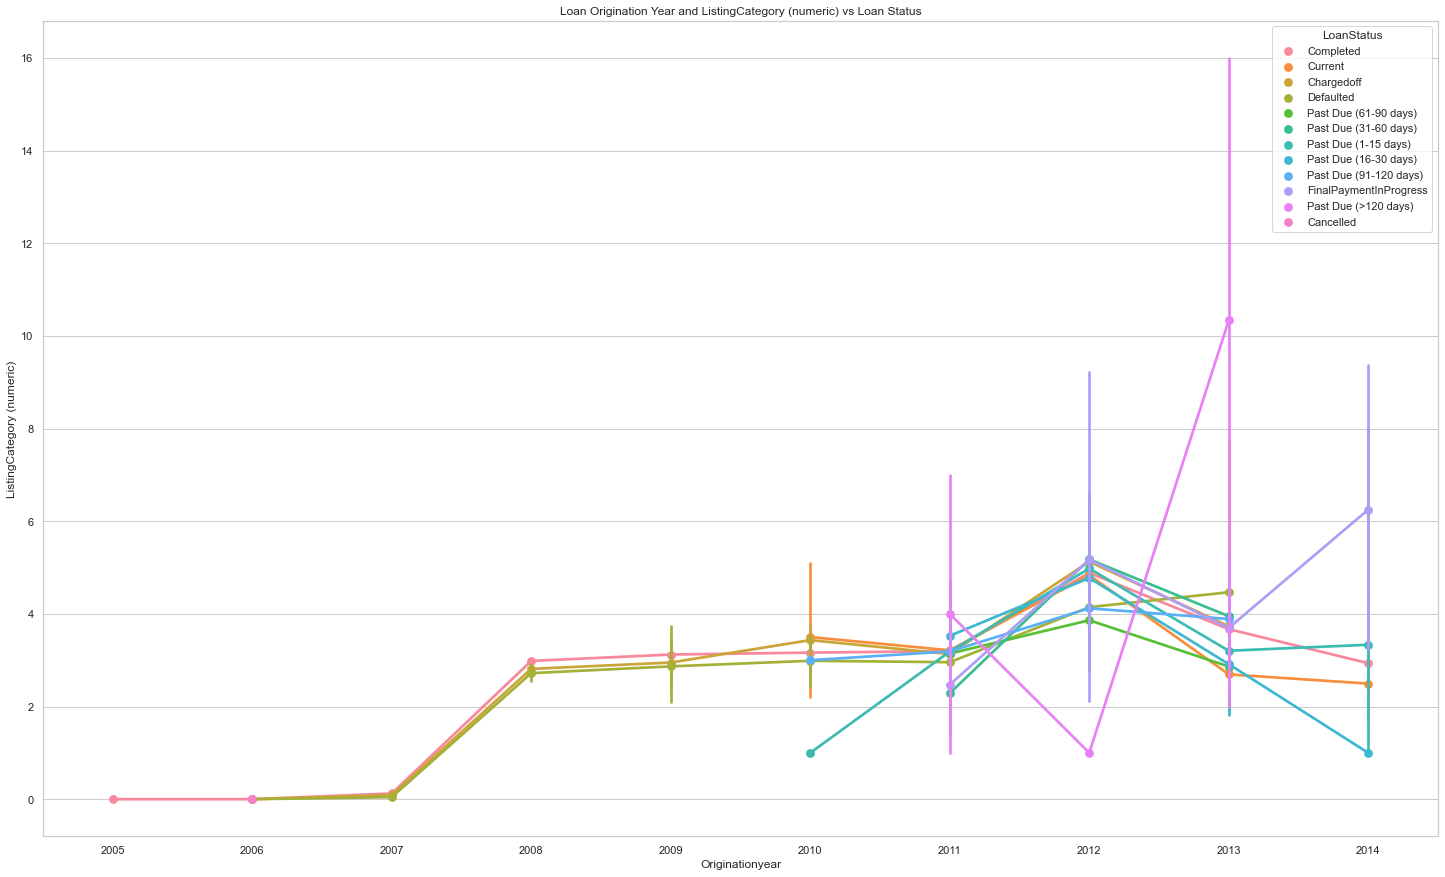

In [136]:
plt.figure(figsize = [25,15])
sb.pointplot(data = df_subset, x = 'Originationyear', 
            y = 'ListingCategory (numeric)', hue = "LoanStatus");

plt.title('Loan Origination Year and ListingCategory (numeric) vs Loan Status');

> <b>Cancelled Loan are prominent in the Listing category in 2013

## 3.4. Loan status, Employment Status, and LP CustomerPrincipalPayments

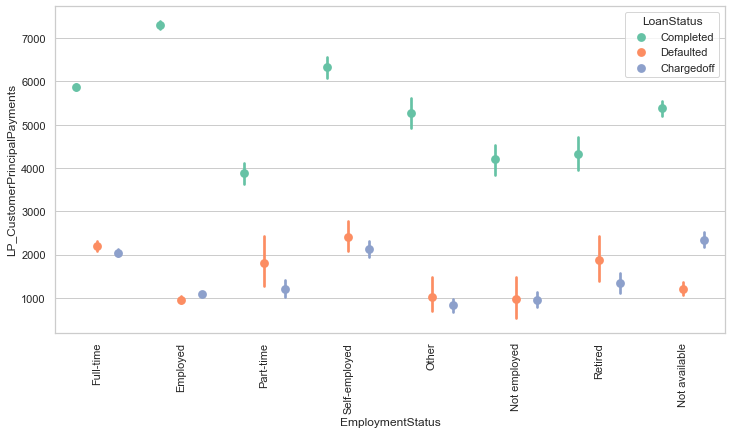

In [138]:
fig, ax = plt.subplots(nrows=1, figsize=(12,6))
sb.pointplot(data=df_prosper_loan_substitute[df_prosper_loan_substitute['CreditScoreAverage']>=400], x='EmploymentStatus', 
             y='LP_CustomerPrincipalPayments', hue='LoanStatus', palette='Set2', 
             dodge=0.5, join=False, ax=ax, order=request)
plt.xticks(rotation=90);

><b>The majority of people who later paid off their loans and had payments that had previously been charged off >= 4500 belong to the employed category.

## 3.5. Employment history, reference letters, and loan status

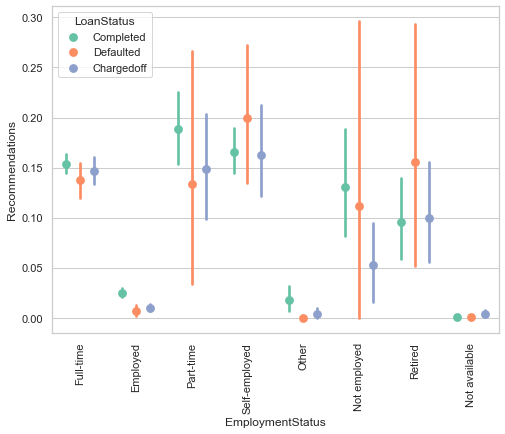

In [139]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='Recommendations', data=df_prosper_loan_substitute, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=request, palette='Set2')
plt.xticks(rotation=90);

> <b>More recommendations are given to those with full-time jobs than to those in other categories, and they also repay their loans.

## 3.6. Status of the loan, listing category, and employment status

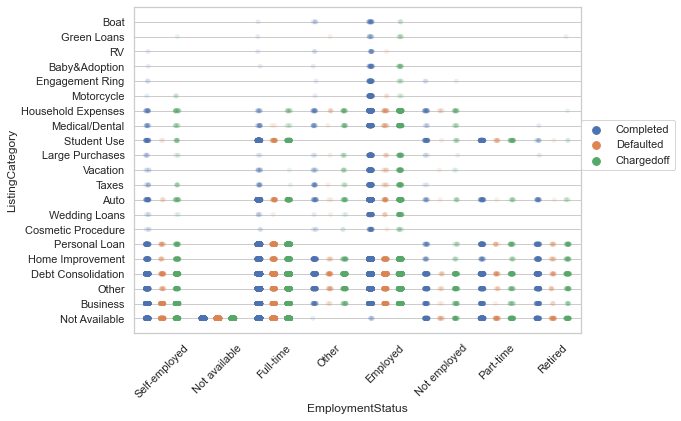

In [140]:
fig, ax = plt.subplots(nrows=1, figsize=(8, 6))
sb.stripplot(data=df_prosper_loan_substitute, y='ListingCategory', x='EmploymentStatus',
             hue='LoanStatus', jitter=True, ax=ax, dodge= 0.7, alpha=1/8)
plt.xticks(rotation=45)
plt.legend(loc=(1,0.5));

><b>An intriguing finding is that those who select "not available" as their work status also frequently select "not available" as their loan's justification and have roughly equal odds of having their loans finished or defaulting. Additionally, people who are in full-time employment appear to borrow for a variety of reasons, some of which have an equal risk of being charged off or defaulted as they have of being paid off.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> By taking into account the interactions of the other relevant factors, I looked at the relationship between employment status and loan status in more detail in this section.

### Were there any interesting or surprising interactions between features?

> Here, the only unexpected choice was Not Available for loan purposes in addition to the Not Available employment status.

## Conclusions
>There were many inferred links in this interesting, difficult, and perplexing dataset, which lacked any explicitly or clearly observable properties for my key variable of interest.
 - During this investigation stage, I anticipated two features. The most likely predictors of my variable of interest are Employment Status and Verifiable Income Sources, but I had to eliminate the Verifiable Income Source after observing its distribution relative to my variable of interest.
 - I was able to conclude from my research that those who meet the following criteria had a higher likelihood of repaying their loans.
 - Whether employed full-time, part-time, or otherwise is the Employement status
 - Loan was borrowed for private purposes.
 - A typical credit score of 650 to 750
 - More than 10 recommendations 
